## 1. Introduction - Introdução
Questão problema é classificar os clientes, avaliando os riscos em uma consessão de crédito.
O modelo criado, irá analisar e decidir se irá aprovar ou negar o pedido de crédito.

O dataset está disponvível no link abaixo.

## 2. Exploring Data - Exploração dos dados

In [95]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
#importando os dados
dfMain = pd.read_csv('datasets/crx.data', header = None)
dfMain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [97]:
#Conhecendo os dados
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [98]:
#Exibindo se há colunas com valores faltantes
dfMain.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [99]:
#Estatísticas dos dados
dfMain.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [100]:
dfMain.shape

(690, 16)

In [101]:
#Inspecionando valores duplicados
dfMain.duplicated().sum()

0

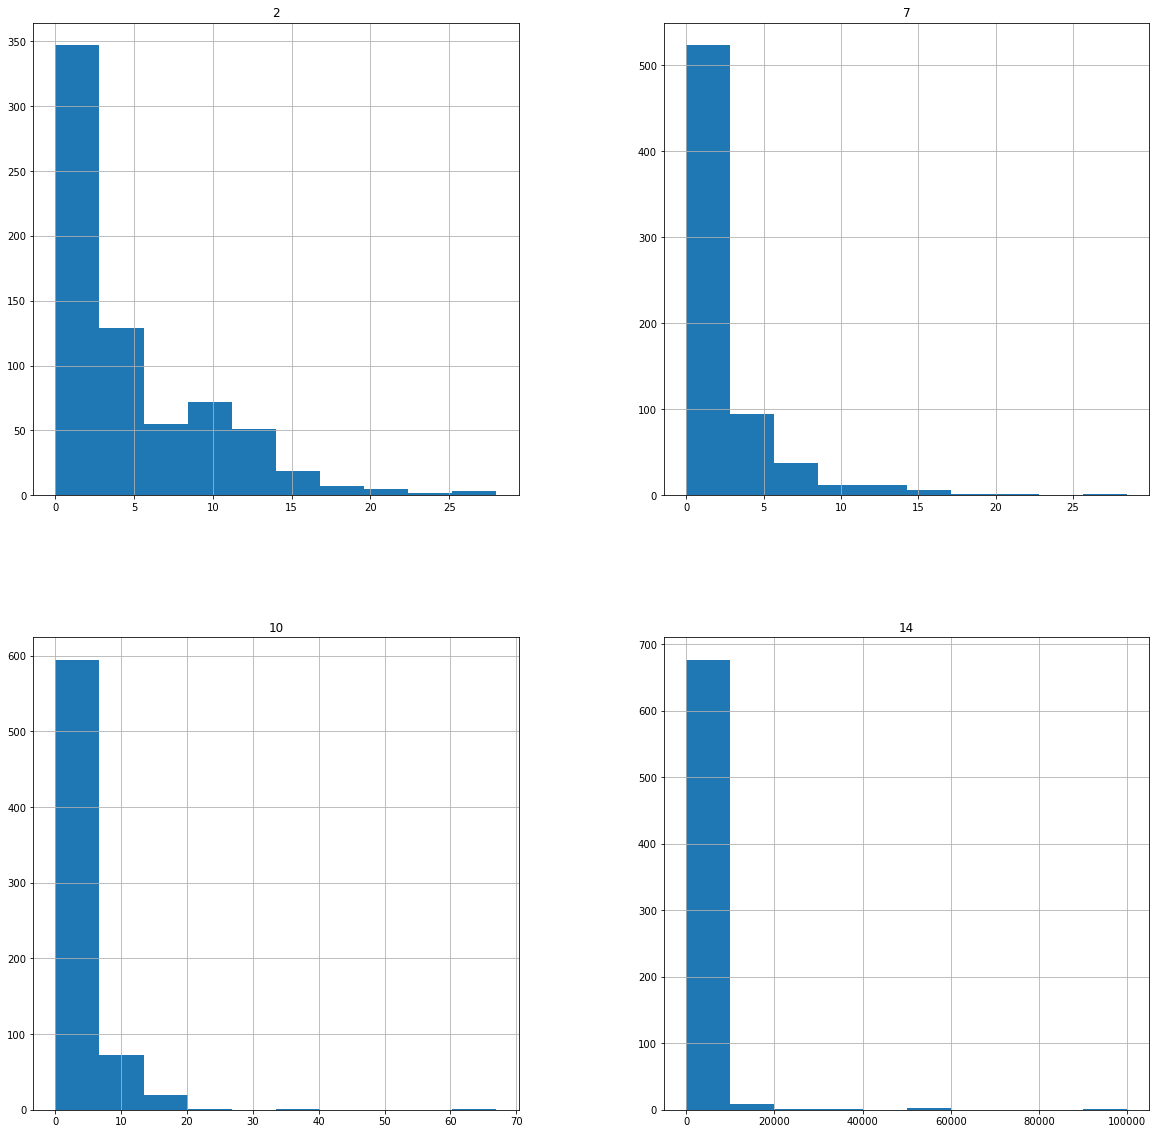

In [102]:
#Plotando histograma para analise das distribuições
dfMain.hist(figsize=(20,20))
plt.show()

In [103]:
#Correlação entre variáveis numéricas
dfMain.corr()

,2,7,10,14
2,1.000000,0.298902,0.271207,0.123121
7,0.298902,1.000000,0.322330,0.051345
10,0.271207,0.322330,1.000000,0.063692
14,0.123121,0.051345,0.063692,1.000000


## 3. Split the dataset - Separando o dataset

In [104]:
#Importando biblioteca para separação
from sklearn.model_selection import train_test_split

#Removendo features que não serão utilizadas, como driver's license e Zip Code. Respectivamente 11,13.
dfMain = dfMain.drop([11,13], axis=1)

# dfTrain, dfTest = train_test_split(dfMain, test_size = 0.33, random_state=42)

In [105]:
dfTrain.shape

(462, 14)

In [106]:
dfTest.shape

(228, 14)

## 4. Data Cleaning - Limpeza dos dados

In [107]:
#Interando nas colunas para perceber se há algum valor diferente do esperado
for i in dfTrain.columns:
    print(i, dfMain[i].unique())

0 ['b' 'a' '?']
1 ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.

In [108]:
for i in dfTest:
    print(i, dfTest[i].unique())

0 ['a' 'b' '?']
1 ['?' '46.00' '20.00' '47.33' '19.17' '24.33' '21.58' '25.00' '21.92'
 '23.50' '40.83' '22.67' '21.67' '30.58' '20.17' '27.83' '16.08' '37.33'
 '29.83' '16.00' '34.75' '21.75' '23.92' '40.25' '34.25' '22.50' '27.67'
 '36.25' '39.92' '19.75' '38.67' '20.67' '60.08' '35.25' '18.50' '47.42'
 '21.83' '38.58' '30.75' '43.08' '34.17' '64.08' '38.92' '34.00' '34.08'
 '22.75' '18.17' '62.50' '30.33' '22.08' '20.42' '30.17' '26.92' '48.33'
 '15.75' '42.00' '50.08' '16.17' '35.75' '39.33' '23.33' '48.58' '24.83'
 '24.50' '36.50' '23.42' '21.08' '21.25' '25.75' '25.83' '19.67' '22.42'
 '19.42' '30.25' '56.75' '30.50' '29.25' '35.17' '20.50' '18.83' '56.42'
 '57.08' '32.33' '60.58' '41.58' '41.17' '69.50' '18.08' '24.92' '45.17'
 '57.83' '50.75' '54.58' '32.25' '41.75' '33.17' '69.17' '22.58' '23.25'
 '32.83' '42.75' '23.08' '51.83' '36.67' '27.58' '29.58' '28.92' '40.92'
 '35.58' '23.17' '25.25' '24.75' '28.00' '28.17' '24.58' '29.17' '39.83'
 '26.00' '53.92' '16.50' '25.42' '16.

In [109]:
#Importando biblioteca numpy
import numpy as np

#Substituindo '?' por NaN
dfTrain[0] = dfTrain[0].replace('?', np.NaN)
dfTest[0] = dfTest[0].replace('?', np.NaN)

In [110]:
#Exibindo valores da primeira coluna
dfTrain[0].unique(), dfTest[0].unique()

(array(['a', 'b', nan], dtype=object), array(['a', 'b', nan], dtype=object))

In [111]:
#Substuindo valores faltantes pela mediana
dfTrain.fillna(dfTrain.mean(), inplace=True)
dfTest.fillna(dfTest.mean(), inplace=True)

/tmp/ipykernel_2985/2318783880.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfTrain.fillna(dfTrain.mean(), inplace=True)
/tmp/ipykernel_2985/2318783880.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfTest.fillna(dfTest.mean(), inplace=True)


In [112]:
dfTrain.isnull().sum(), dfTest.isnull().sum()

(0     8
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 12    0
 14    0
 15    0
 dtype: int64,
 0     4
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 12    0
 14    0
 15    0
 dtype: int64)

In [113]:
#Substituindo valores não numericos (categóricos)
for col in dfTrain.columns:
    #Checando o tipo da coluna
    if dfTrain[col].dtypes == 'object':
        #Realizando a substiuição
        dfTrain = dfTrain.fillna(dfTrain[col].value_counts().index[0])
        dfTest = dfTest.fillna(dfTest[col].value_counts().index[0])
        
#Exibindo valores nulos        
dfTrain.isnull().sum(), dfTest.isnull().sum()

(0     0
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 12    0
 14    0
 15    0
 dtype: int64,
 0     0
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 12    0
 14    0
 15    0
 dtype: int64)

# 5. Pre-processing - Pré-processamento 

In [114]:
#convertendo dados categóricos em numéricos
dfTrain = pd.get_dummies(dfTrain)
dfTest = pd.get_dummies(dfTest)

#Usando reindex para evitar erro nas predicções usando matrizes
dfTest = dfTest.reindex(columns=dfTrain.columns, fill_value=0)

In [115]:
#Escalonando os dados
from sklearn.preprocessing import MinMaxScaler

#Separando os dados de treino e teste
X_train, y_train = dfTrain.iloc[:, :-1].values, dfTrain.iloc[:, [-1]].values
X_test, y_test = dfTest.iloc[:,:-1].values, dfTest.iloc[:,[-1]].values

#Instanciando o objeto
scaler = MinMaxScaler(feature_range=(0,1))
#Padronizando os dados de treino e teste
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)


In [122]:
dfTrain.head()

,2,7,10,14,0_a,0_b,1_13.75,1_15.83,1_15.92,1_16.00,...,6_z,8_f,8_t,9_f,9_t,12_g,12_p,12_s,15_+,15_-
382,2.500,4.50,0,456,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
137,2.750,4.25,6,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
346,1.500,0.25,0,122,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
326,1.085,0.04,0,179,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
33,5.125,5.00,0,4000,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0


In [120]:
X = dfTrain.iloc[:, :-1]
y = dfTest.iloc[:,[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [462, 228]

## Buildin a Model - Construindo o Modelo

In [116]:
#Imporando LogisticRegression
from sklearn.linear_model  import LogisticRegression

#Instanciando
log = LogisticRegression()

#Treinando 
log.fit(rescaledX_train, y_train)


#Exibindo a acurácia do modelo
print(f"A acurácia do modelo é {log.score(rescaledX_train, y_test)}" )

/home/marcus/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [228, 462]

In [ ]:
rescaledX_train.shape


(483, 466)

## Making Predictions - Fazendo previsões

In [ ]:
#Importando matriz de confusão
from sklearn.metrics import confusion_matrix

#Prevendo
y_pred = log.predict(rescaledX_test)

#Exibindo a acurácia do modelo
print(f"A acurácia do modelo é {log.score(rescaledX_test, y_test)}" )

#Plotando matriz de confusão
confusion_matrix(y_test, y_pred)

ValueError: X has 298 features, but LogisticRegression is expecting 466 features as input.